# Avance 1

In [1]:
!pip install xlrd
!pip install openpyxl

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## Set de datos

In [2]:
import sys
import os
project_path = os.path.abspath('../')
sys.path.insert(1, project_path)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style('darkgrid')

from src.eda.plots import cat_distribution, num_distribution

## Descripción de base de datos

| Campos            | Descripción | Relevante |
| ----------------- | ----------- | :----------: |
| ProcesoSancionId | Identificador único numérico de la fiscalización | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| Expediente | Expediente de la fiscalización. Corresponde a un identificador único (texto) | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| ProcesoSancionTipoNombre | Indica la tipología del proceso de sanción según su origen: Autodenuncia, Fiscalización, Denuncia o Programa de Cumplimiento | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| ProcesoSancionEstado | Indica diferentes estados del proceso de sanción |  <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| FechaInicio | Fecha de inicio del proceso sancionatorio | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| FechaTermino | Fecha de inicio del proceso sancionatorio, si la hubiera | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| ConfirmaPdC | Si el titular presentó o no un programa de cumplimiento |<table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table> |
| MultaTotalUTA | Multa total del proceso sancionatorio media en Unidades Tributarias Anuales, si la hubiera | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| LinkSNIFA | Link de SNIFA con la información documental de la fiscalización |<table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table> |
| UnidadFiscalizableId | Identificador único numérico de la Unidad Fiscalizable | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| Nombre | Nombre de la Unidad Fiscalizable. El nombre de las UF de subcategoría | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| RegionNombre | Nombre de la región donde está ubicada la Unidad Fiscalizable | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| ComunaNombre | Nombre de la comuna donde está ubicada la Unidad Fiscalizable | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| Latitud | Latitud de la Unidad Fiscalizable en coordenadas geodésicas representadas en grados decimales (datum WGS84). La ubicación para las UF de subcategoría económica “Casa-habitación” se consideran datos privados o sensibles por lo que son dejadas en blanco (NA) |  <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| Longitud | Longitud de la Unidad Fiscalizable en coordenadas decimales (datum WGS84). La ubicación para las UF de subcategoría económica “Casa-habitación” se consideran datos privados o sensibles por lo que son dejadas en blanco (NA) | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| CategoriaEconomicaNombre | Categoría económica o rubro de la Unidad Fiscalizable | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| SubCategoriaEconomicaNombre | Segundo nivel de detalle del rubro o categoría económica de la UF | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| LinkSNIFA_UF | Link web con la ficha de la Unidad Fiscalizable en SNIFA | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|
| FechaActualizacion | Fecha cuando el presente archivo fue actualizado | <table><tr><td><input type="checkbox" name="myTextEditBox" value="checked" /></td></tr></table>|

- 'LinkSNIFA' y 'LinkSNIFA_UF', al solo contener hipervínculos referentes a otros documentos, no aportan información relevante para el estudio.

- De igual manera 'FechaActualizacion' tampoco resulta relevante, al poseer un único valor referente a la última actualización de los datos.

- 

## Carga de datos

In [4]:
df = pd.read_excel('../data/Sancionatorios_Act2023-04-19.xlsx',sheet_name='Sheet 1')

# Se descartan columnas no relevantes
df.drop(columns=['ProcesoSancionId', 'UnidadFiscalizableId','LinkSNIFA', 'LinkSNIFA_UF', 'FechaActualizacion','Expediente','Nombre'], axis=1, inplace=True)

df

,ProcesoSancionTipoNombre,ProcesoSancionEstado,FechaInicio,FechaTermino,ConfirmaPdC,MultaTotalUTA,RegionNombre,ComunaNombre,Latitud,Longitud,CategoriaEconomicaNombre,SubCategoriaEconomicaNombre
0,Autodenuncia,En curso,27-03-2013,17-09-2020,No,7021.0,Región de Atacama,Alto del Carmen,-29.282648,-70.063014,Minería,Minera metálica
1,Fiscalización,Terminado - Sanción,01-04-2013,13-08-2013,No,94.0,Región Metropolitana,La Reina,-33.453000,-70.570000,Equipamiento,Centro comercial
2,Autodenuncia,Terminado - PDC Satisfactorio,08-02-2013,12-02-2014,SÃ,NaN,Región de Tarapacá,Pica,-21.002000,-68.795800,Minería,Minera metálica
3,Denuncia,Terminado - Sanción,02-05-2013,11-10-2013,No,25.0,Región de los Lagos,Chonchi,-42.627141,-73.841298,Saneamiento Ambiental,Vertedero
4,Fiscalización,Terminado - PDC Satisfactorio,08-05-2013,01-08-2014,SÃ,NaN,Región de Aysén del General Carlos Ibáñez del ...,Aysén,-44.506667,-73.610122,Pesca y Acuicultura,Centro de cultivo de peces
...,...,...,...,...,...,...,...,...,...,...,...,...
2192,Denuncia,En curso,17-04-2023,NaN,No,NaN,Región de Magallanes y la Antártica Chilena,Punta Arenas,-53.203056,-73.555078,Pesca y Acuicultura,Centro de cultivo de peces
2193,Autodenuncia,En curso,17-04-2023,NaN,No,NaN,Región de Magallanes y la Antártica Chilena,Punta Arenas,-53.198231,-73.497729,Pesca y Acuicultura,Centro de cultivo de peces
2194,Autodenuncia,En curso,17-04-2023,NaN,No,NaN,Región de Magallanes y la Antártica Chilena,Río Verde,-52.794408,-73.512683,Pesca y Acuicultura,Centro de cultivo de peces
2195,Autodenuncia,En curso,17-04-2023,NaN,No,NaN,Región de Magallanes y la Antártica Chilena,Río Verde,-52.797397,-73.378403,Pesca y Acuicultura,Centro de cultivo de peces


## Conteo de valores

In [5]:
counts = pd.concat([df.count(), df.nunique(), df.isna().sum(), df.dtypes], axis=1)
counts.columns = ['Conteo de valores', 'Conteo de valores únicos', 'Conteo de NaNs', 'Tipos de datos']
counts.index.name = 'Columnas'
counts.iloc[:,:-1] = counts.iloc[:,:-1].astype(str) + ' (' +(counts.iloc[:,:-1] / df.shape[0] * 100).round(2).astype(str)  + '%)'

counts

,Conteo de valores,Conteo de valores únicos,Conteo de NaNs,Tipos de datos
Columnas,,,,
ProcesoSancionTipoNombre,2197 (100.0%),4 (0.18%),0 (0.0%),object
ProcesoSancionEstado,2197 (100.0%),7 (0.32%),0 (0.0%),object
FechaInicio,2197 (100.0%),1083 (49.29%),0 (0.0%),object
FechaTermino,908 (41.33%),611 (27.81%),1289 (58.67%),object
ConfirmaPdC,2197 (100.0%),2 (0.09%),0 (0.0%),object
MultaTotalUTA,726 (33.05%),289 (13.15%),1471 (66.95%),float64
RegionNombre,2197 (100.0%),16 (0.73%),0 (0.0%),object
ComunaNombre,2197 (100.0%),271 (12.34%),0 (0.0%),object
Latitud,2171 (98.82%),1994 (90.76%),26 (1.18%),float64


## Valores nulos

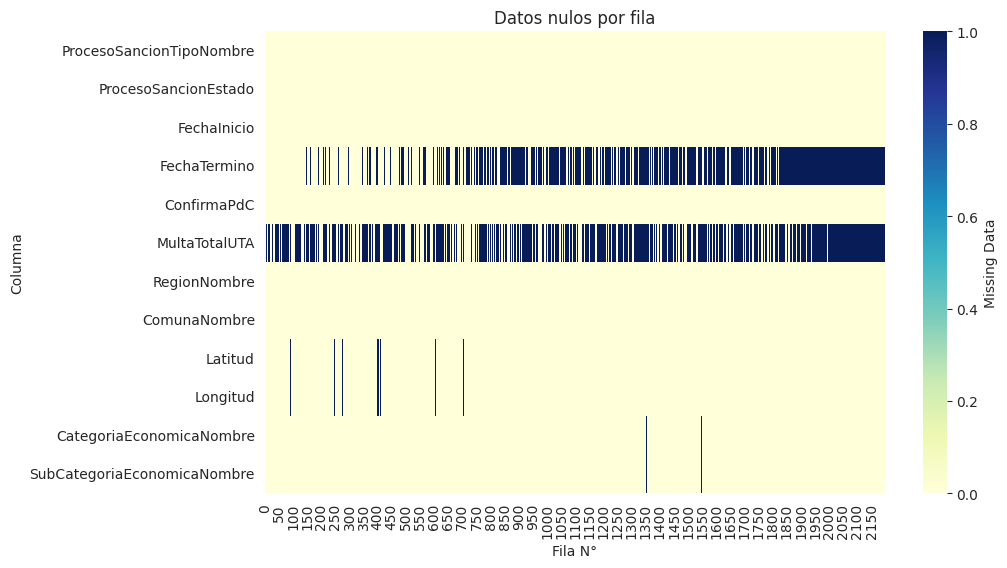

In [6]:
fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'},
            ax=ax)

ax.set_title('Datos nulos por fila')
ax.set_xlabel('Fila N°')
ax.set_ylabel('Columna')
plt.show()

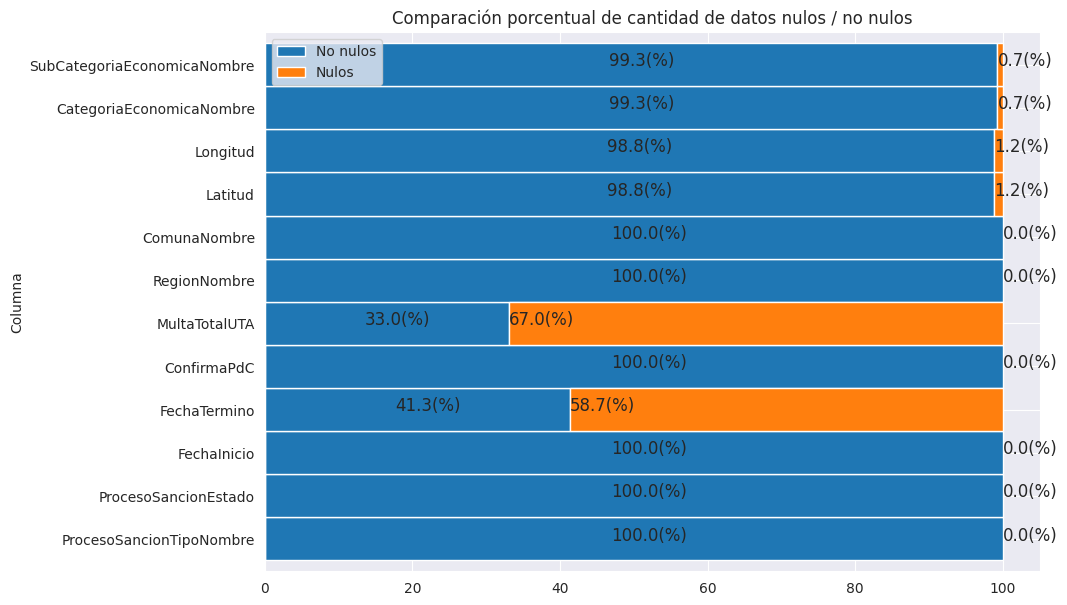

In [7]:
temp = (df.count() / df.shape[0] * 100).reset_index()
temp.rename(columns={'index':'Columna', 0:'No nulos'}, inplace=True)
temp['Nulos'] = (df.isna().sum() / df.shape[0]).values * 100


fig, ax = plt.subplots(figsize=(10, 7))

temp.plot(
    x = 'Columna',
    kind = 'barh',
    stacked = True,
    title = 'Comparación porcentual de cantidad de datos nulos / no nulos',
    mark_right = True,
    width=1,
    ax=ax)

for idx in range(temp.shape[0]):
    ax.text(temp.iloc[idx, 1] / 2 - 3, idx / 1 + 0.3, '{:.1f}(%)'.format(temp.iloc[idx, 1]), fontsize=12,
                verticalalignment='top')

    ax.text(temp.iloc[idx, 1]+0.04, idx / 1 + 0.3, '{:.1f}(%)'.format(temp.iloc[idx, 2]), fontsize=12,
                verticalalignment='top')

plt.show()

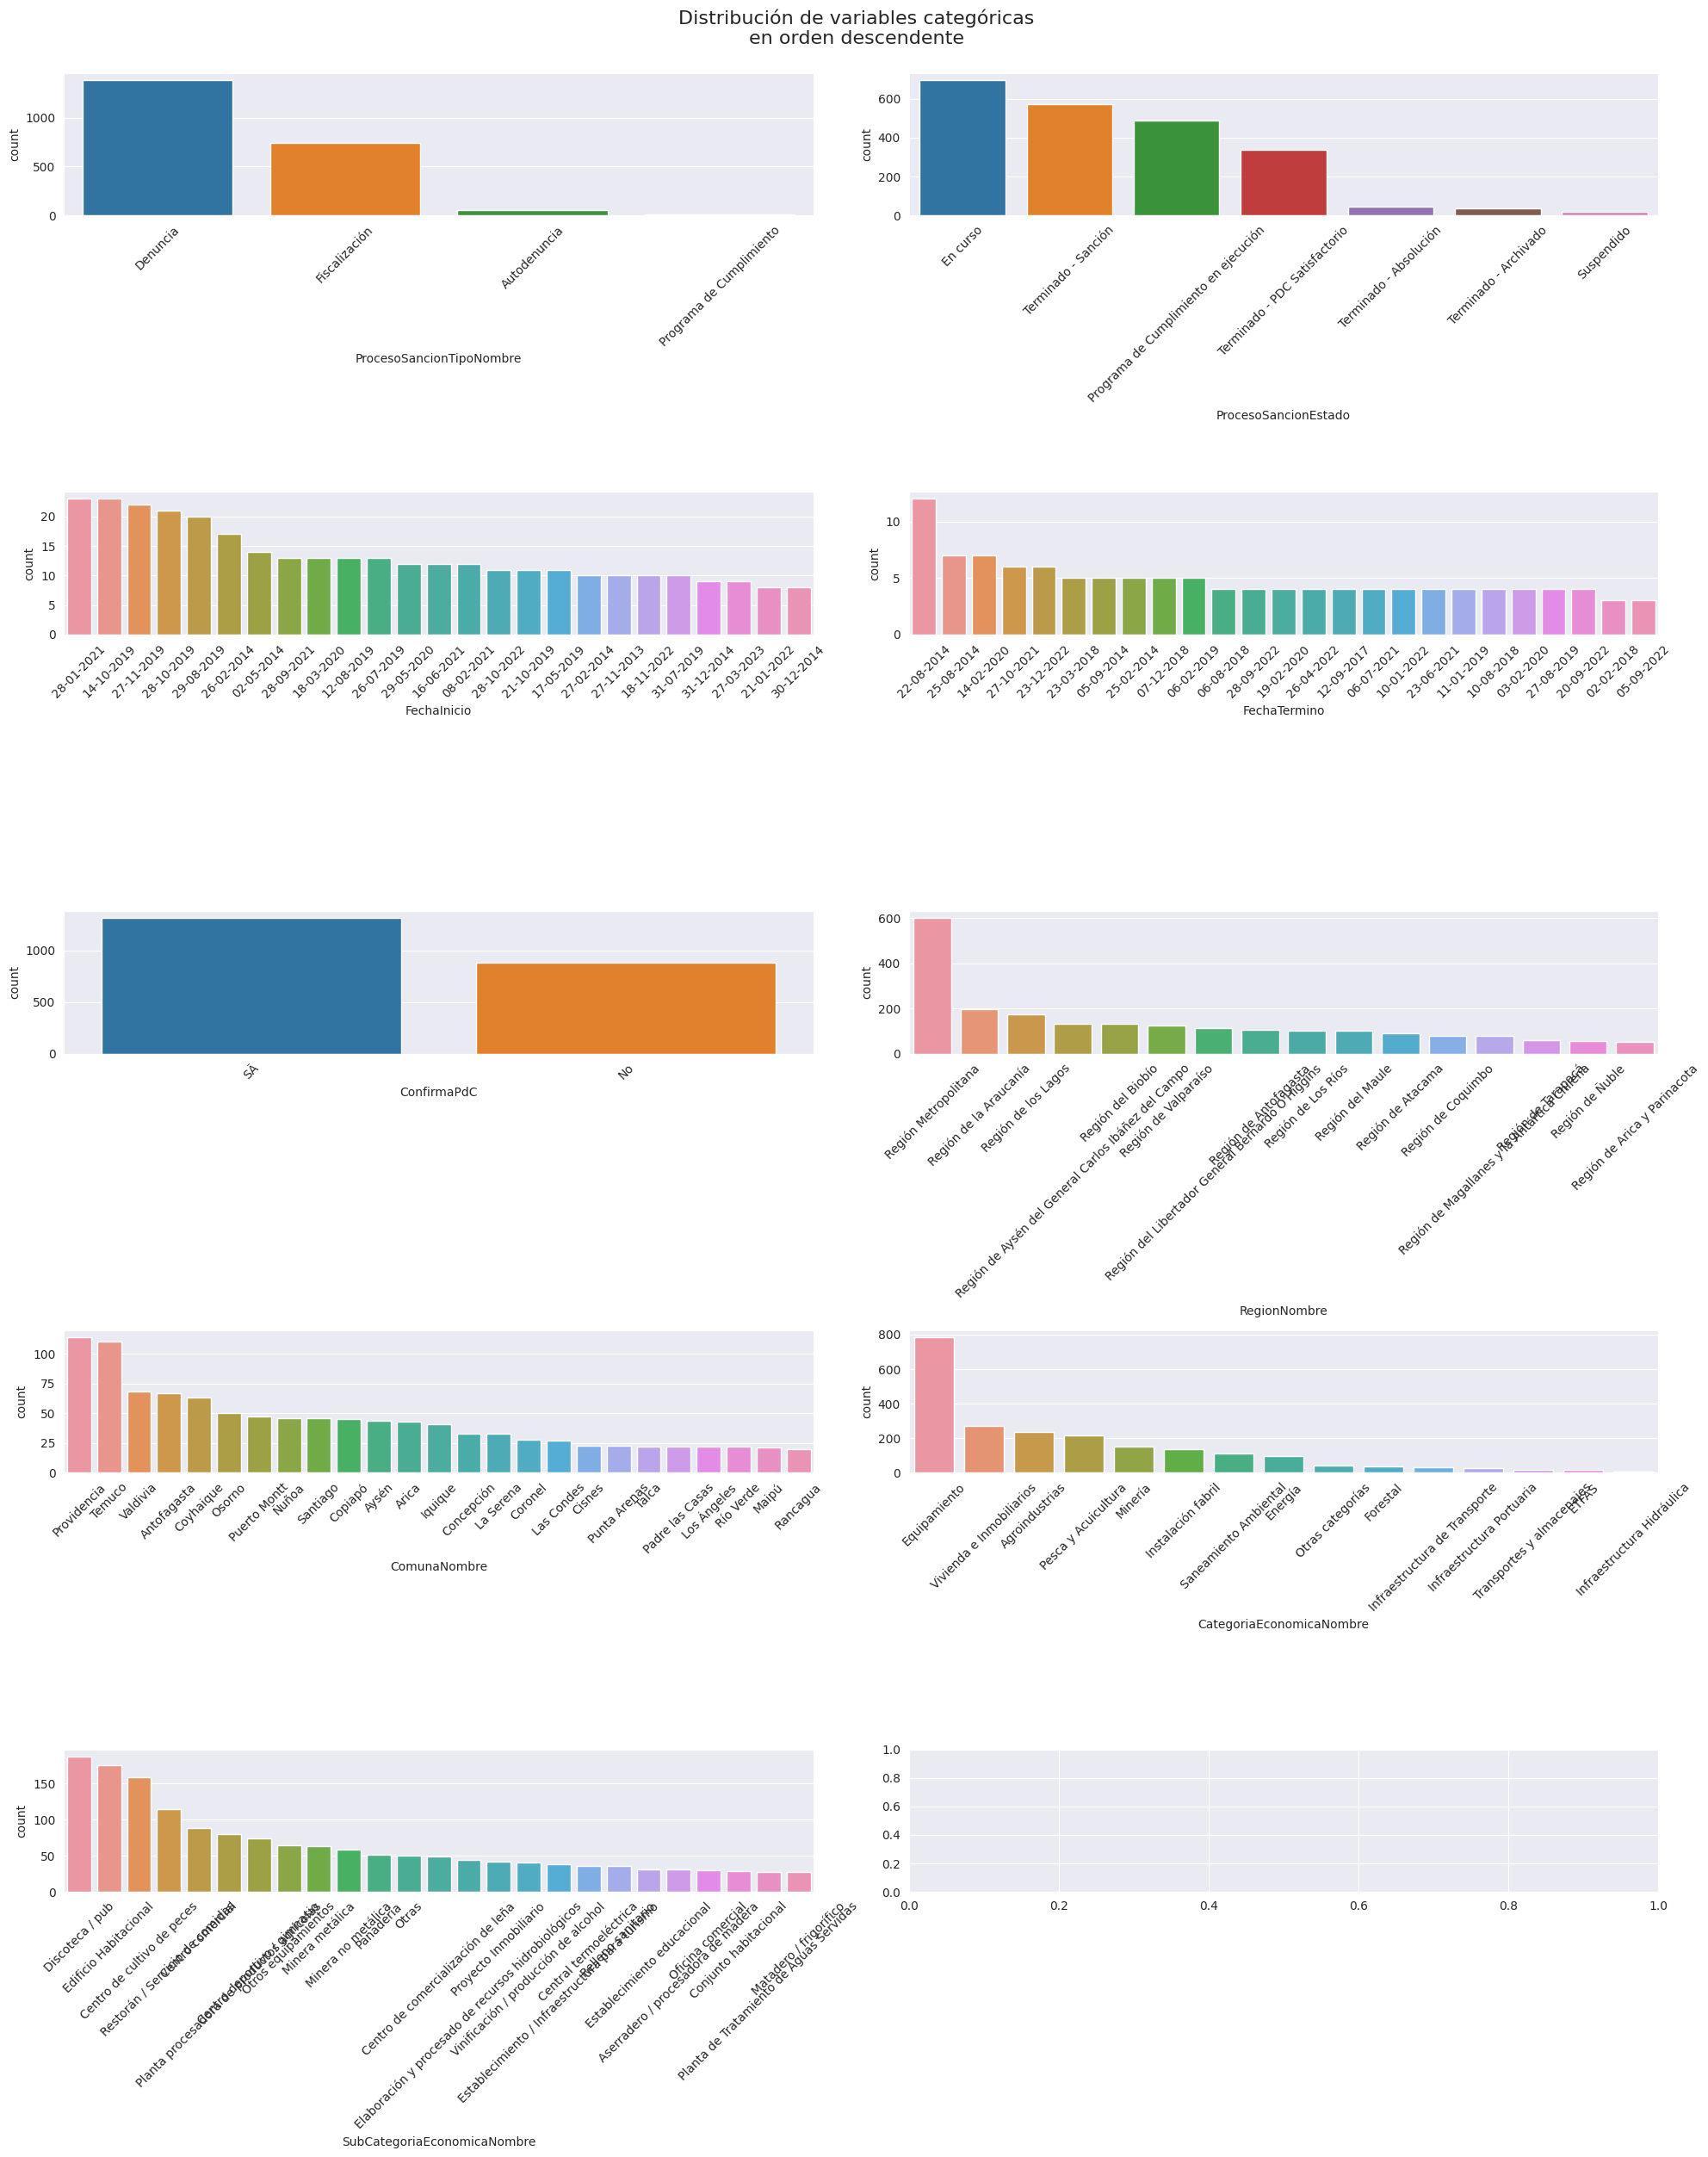

In [8]:
cat_distribution(df)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=408a1127-a110-4797-8d5d-2cf2d5cd92ef' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>